## *** Sentiment Analysis of Tweets: Understanding Public Opinion on Social Media ***

___
### Dataset Introduction

This dataset contains tweets related to various topics or entities, along with sentiment analysis. The data is collected from Twitter and focuses on capturing user opinions and experiences shared via tweets. The tweets are categorized by sentiment, and each entry includes information about the entity being discussed. This type of dataset can be useful for analyzing public perception, tracking brand reputation, and identifying key topics or trends.
___

___
#### ** Columns in the Dataset **

    Tweet ID:
        Description: A unique identifier assigned to each tweet. This ID is essential for referencing individual tweets within the dataset and for linking them to other relevant data if needed (e.g., replies, retweets).
        Example: 1234567890

    Sentiment:
        Description: The sentiment classification of the tweet, which can typically be Positive, Negative, or Neutral. This sentiment is usually determined through natural language processing (NLP) techniques to understand the general emotion conveyed in the tweet.
        Example: Positive

    Entity:
        Description: The entity or brand being discussed in the tweet. This could refer to a company, product, or any other notable subject being mentioned or referenced. For example, the entity might be "Borderlands" or "Madden NFL" if the tweet is discussing a specific video game.
        Example: Borderlands 3

    Tweet Text:
        Description: The full text of the tweet, which contains the user's opinion, feedback, or statement. This column allows us to perform detailed analysis, such as extracting specific keywords or phrases associated with particular sentiments or entities.
        Example: "I love playing #Borderlands3! It's so much fun!"
___

### Step-1 : Import necessary libraries

In [275]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import re  # For regular expressions to clean text
import matplotlib.pyplot as plt  # For data visualization (e.g., plotting graphs)
from wordcloud import WordCloud  # For generating word clouds from text data
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

### Step-2 Load the dataset

In [276]:
# Load the dataset without headers
df_sentiment= pd.read_csv('twitter_training(1).csv', header=None)

# Assign column names manually
df_sentiment.columns = ['Tweet_id','entity', 'Sentiment',  'Tweet Text']

# Show the first few rows with the new column names
df_sentiment.head()


,Tweet_id,entity,Sentiment,Tweet Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


### Step-3 Preprocessing the Text Data

#### 3.4 Check for duplicated rows

In [277]:
# Count duplicate rows (excluding the first occurrence)
duplicate_count = df_sentiment.duplicated().sum()

print(f"Number of duplicate rows before: {duplicate_count}")

# Remove duplicates, keeping the first occurrence
df_no_duplicates = df_sentiment.drop_duplicates()
no_dup_count=df_no_duplicates.duplicated().sum()
print(f"Number of duplicate rows after: {no_dup_count}")

Number of duplicate rows before: 2701
Number of duplicate rows after: 0


#### 3.2 View concise summary of the dataset

In [278]:
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71981 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweet_id    71981 non-null  int64 
 1   entity      71981 non-null  object
 2   Sentiment   71981 non-null  object
 3   Tweet Text  71655 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


#### *Observations
The dataset consists of 71,981 entries with four columns: `Tweet_id`, `entity`, `Sentiment`, and `Tweet Text`. Key observations include:

- **Non-Null Values**:
    - The `Tweet_id`, `entity`, and `Sentiment` columns are complete, each containing **71,981 non-null values**.
    - However, the `Tweet Text` column has **71,655 non-null values**, indicating **326 missing entries** (i.e., ~0.45% of the data lacks tweet text).


#### 3.3 Remove rows with missing 'Tweet Text'

In [279]:
# Remove rows with missing 'Tweet Text'
df_no_duplicates = df_no_duplicates.dropna(subset=['Tweet Text'])

# Verify the result by checking the data again
print(df_no_duplicates.info())

<class 'pandas.core.frame.DataFrame'>
Index: 71655 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweet_id    71655 non-null  int64 
 1   entity      71655 non-null  object
 2   Sentiment   71655 non-null  object
 3   Tweet Text  71655 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB
None


### Reasons for Dropping Rows with Missing Tweet Text

- **Reasonablly minimal Data Loss**:  
  With only 326 missing values out of 71,655 rows, removing these rows has a minimal impact on the overall dataset size. The loss is small compared to the total amount of data, ensuring that the analysis will still be representative.

- **Ensures Data Quality**:  
  Rows with missing **Tweet Text** are incomplete and can't contribute meaningfully to sentiment analysis or text-based tasks. Removing them ensures that you're working with clean, relevant data.

- **Improved Analysis Accuracy**:  
  Sentiment analysis and text analysis require full-text data to assess meaning accurately. Rows without text could lead to errors or skewed results in the analysis if left in the dataset.

#### 3.4 Cleaning the tweet text

In [280]:
# Function to clean the tweet text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions (e.g., @username)
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove special characters and numbers, keeping only alphabets
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply cleaning function to the tweet text column (convert to string to avoid TypeError)
df_no_duplicates['cleaned_tweet'] = df_no_duplicates['Tweet Text'].apply(lambda x: clean_text(str(x)))

# Show the cleaned dataset
df_no_duplicates.tail()


,Tweet_id,entity,Sentiment,Tweet Text,cleaned_tweet
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,just realized that the windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,just realized that my mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,just realized the windows partition of my mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...,just like the windows partition of my mac is l...


___
#### Why clean the tweet text?
*Tweets are typically written informally, and they may contain elements (such as URLs, mentions, hashtags, or special characters) that are not useful or might even interfere with the analysis of sentiment or key words. Cleaning the text ensures that we're working with a consistent format that focuses on the actual words (and not on irrelevant elements), which improves the accuracy of sentiment analysis and other text-based tasks.*

***Examples:
- **"Check out my website at https://example.com"** becomes **"Check out my website at ..."**

- **"Great job @johnDoe!"** becomes **"Great job !"**

- **"Loving the weather! #sunnyday"** becomes **"Loving the weather!"**

- **"Great Job!"** becomes **"great job!"**
___


### Step-5: Visualization for Sentiment Distribution

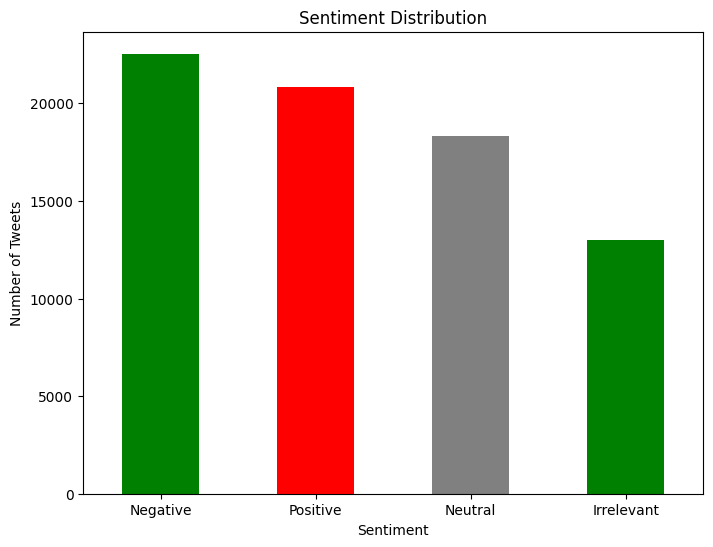

In [281]:
import matplotlib.pyplot as plt

# Calculate the sentiment distribution
sentiment_counts = df_sentiment['Sentiment'].value_counts()

# Plot the sentiment distribution as a bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'grey'])  # Adjust colors to suit Positive, Negative, Neutral
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)  # Rotate x-axis labels to keep them horizontal
plt.show()

### Interpretation for the bar graph

- **Overall positive sentiment is dominant**, with over 33,500 tweets classified as positive, indicating that people are mostly sharing favorable opinions or feelings about the topic or entity being discussed.

- **Negative sentiment follows** ,with about 27,500 tweets This suggests that while there are some critical or unfavorable opinions, they are not the dominant sentiment.

- **Neutral sentiment is the least common**, with around 13,000 tweets. This indicates that there are a considerable number of tweets where the sentiment is neither strongly positive nor negative, potentially representing neutral discussions or fact-based statements.


In [282]:
# Calculate the sentiment distribution and print it
sentiment_counts = df_sentiment['Sentiment'].value_counts()
print("Sentiment Distribution:")
print(sentiment_counts)


Sentiment Distribution:
Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


In [283]:
# Filter out irrelevant tweets
df_relevant = df_no_duplicates[df_no_duplicates['Sentiment'] != 'Irrelevant']
df_relevant.info()


<class 'pandas.core.frame.DataFrame'>
Index: 59118 entries, 0 to 74681
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_id       59118 non-null  int64 
 1   entity         59118 non-null  object
 2   Sentiment      59118 non-null  object
 3   Tweet Text     59118 non-null  object
 4   cleaned_tweet  59118 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.7+ MB


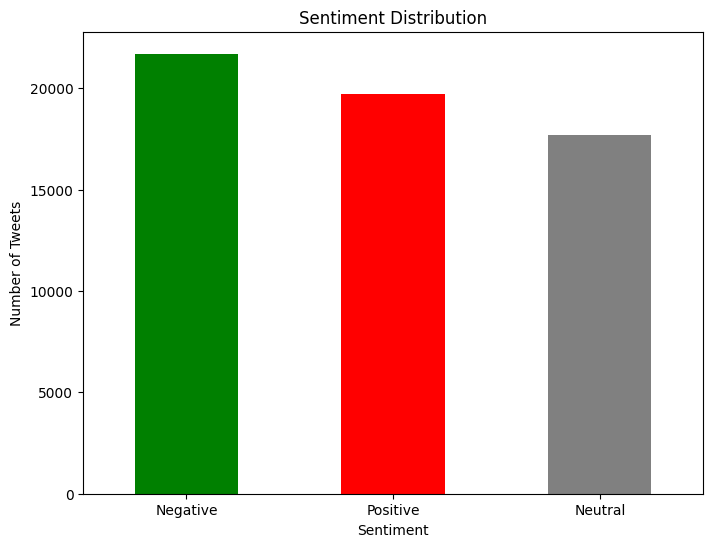

In [284]:
import matplotlib.pyplot as plt

# Calculate the sentiment distribution
sentiment_counts = df_relevant['Sentiment'].value_counts()

# Plot the sentiment distribution as a bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'grey'])  # Adjust colors to suit Positive, Negative, Neutral
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)  # Rotate x-axis labels to keep them horizontal
plt.show()

### Step-5 Generate Word Clouds for "Positive" and "Negative" Sentiments

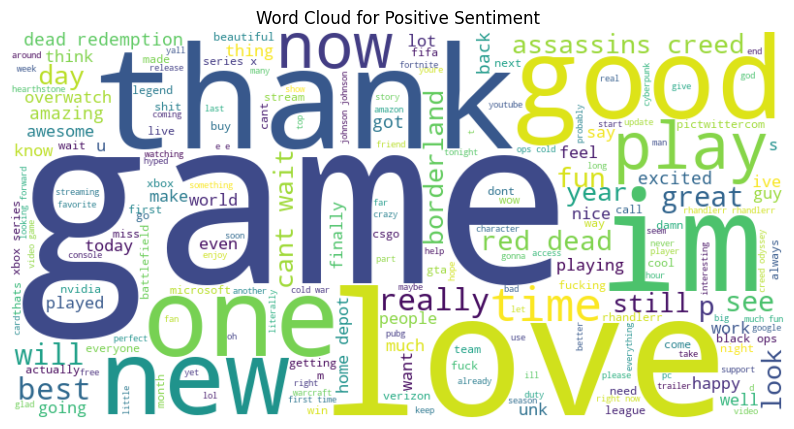

In [285]:
def generate_wordcloud(sentiment_df, sentiment):
    # Combine all text in the selected sentiment group
    text = ' '.join(sentiment_df[sentiment_df['Sentiment'] == sentiment]['cleaned_tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()

# Generate word clouds for each sentiment type using the df_relevant dataset
generate_wordcloud(df_relevant, 'Positive')
#generate_wordcloud(df_relevant, 'Negative')
#generate_wordcloud(df_relevant, 'Neutral')

___
#### ***Observation***
Words such as **good**, **love**, **best**, **thank**, **legend**, **amazing**, **awesome**, **cool**, **better**, **great**, **happy**, **win**, **excited**, **fun**, **looklegend**, and **nice** are prominently observed in the positive sentiment word cloud. This suggests that users are expressing strong appreciation, positive emotions, and gratitude towards the topic or entity. These words indicate a generally favorable and enthusiastic tone in the positive sentiment tweets.
___


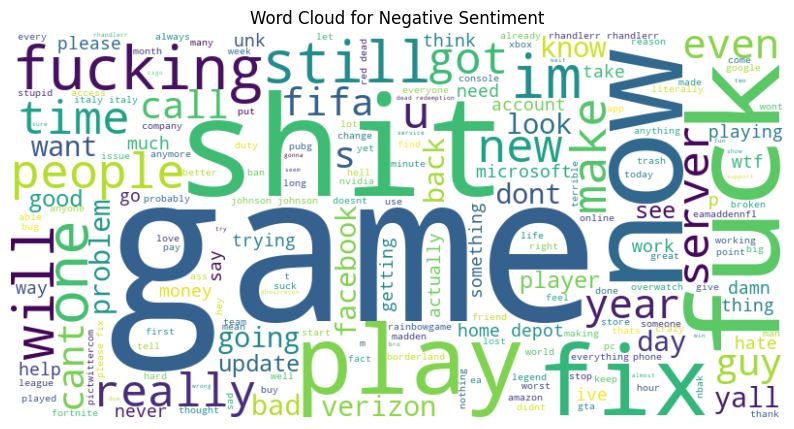

In [286]:
generate_wordcloud(df_relevant, 'Negative')

___
#### ***Observation***
Words like **shit**, **fuck**, **fucking**, **problem**, **bad**, **hate**, **hard**, **worst**, **stupid**, and **damn** along with **cant**, **dont** were observed in the negative sentiment word cloud. These words reflect strong negative emotions, frustration, and dissatisfaction. The presence of such terms suggests that users are expressing criticism, anger, or disapproval towards the topic or entity being discussed.
___


In [287]:
# Get the unique values from the 'entity' column
unique_entities = df_sentiment['entity'].unique()

# Display the unique entities
print(unique_entities)

['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty' 'TomClancysRainbowSix' 'Facebook'
 'GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson' 'Cyberpunk2077'
 'TomClancysGhostRecon' 'Nvidia']


___
***The entities in this dataset are popular **brands, games, and companies**  Here's a breakdown of what they represent:

### Video Games:
- **Borderlands**: A popular first-person shooter game series known for its humor and open-world gameplay.
- **CallOfDutyBlackopsColdWar**: A title in the Call of Duty franchise, focusing on Cold War-era espionage and combat.
- **Overwatch**: A team-based multiplayer first-person shooter game with unique characters, known for its colorful and diverse world.
- **NBA2K**: A basketball video game series featuring real-life NBA teams and players.
- **Dota2**: A popular multiplayer online battle arena (MOBA) game.
- **PlayStation5(PS5)**: The fifth-generation gaming console from Sony, with exclusive games and enhanced graphics.
- **CS-GO (Counter-Strike: Global Offensive)**: A multiplayer first-person shooter game focused on tactical team-based action.
- **AssassinsCreed**: An action-adventure game series focusing on historical settings and stealth-based gameplay.
- **ApexLegends**: A free-to-play battle royale game featuring heroes with unique abilities.
- **LeagueOfLegends**: A popular multiplayer online battle arena (MOBA) game.
- **Fortnite**: A highly popular battle royale game known for its building mechanics and live events.
- **RedDeadRedemption(RDR)**: A western-themed action-adventure game.
- **Cyberpunk2077**: A sci-fi open-world action RPG set in a dystopian future.
- **GrandTheftAuto(GTA)**: An action-adventure series known for its open-world environments and crime-based storylines.
- **MaddenNFL**: An NFL (National Football League) football video game series.
- **FIFA**: A soccer video game series known for its realistic gameplay and licensing with real-life teams and players.
- **TomClancysRainbowSix**: A tactical first-person shooter game featuring counter-terrorist operations.
- **TomClancysGhostRecon**: A military tactical shooter game.
- **Battlefield**: A series of first-person shooter games focusing on large-scale battles and military combat.

### Companies/Brands:
- **Amazon**: One of the largest e-commerce companies globally.
- **Microsoft**: A major technology company, known for products like Windows, Xbox, and Office software.
- **Google**: A multinational technology company best known for its search engine, Android OS, and other internet services.
- **Verizon**: A major telecommunications company offering mobile, internet, and TV services.
- **HomeDepot**: A large American home improvement retail company.
- **Johnson&Johnson**: A multinational corporation known for medical devices, pharmaceuticals, and consumer health products.

### Game Consoles:
- **Xbox(Xseries)**: A video game console from Microsoft, known for its next-gen hardware and exclusive games.
- **PlayStation5(PS5)**: The latest console from Sony with powerful features and exclusive games.

### Online Games & Platforms:
- **PlayerUnknownsBattlegrounds(PUBG)**: A popular battle royale game.
- **Hearthstone**: A card game based on the World of Warcraft universe.
- **WorldOfCraft**: Likely referring to **World of Warcraft**, a massively multiplayer online role-playing game (MMORPG).

These names represent brands, game franchises, and companies that have significant influence in the world of gaming, technology, and entertainment. Most of them have massive fan bases, online communities, and media coverage.
___

### Step-6 Visulizing Attitudes towards the Entities/Brands,Games,Platforms

<Figure size 1200x800 with 0 Axes>

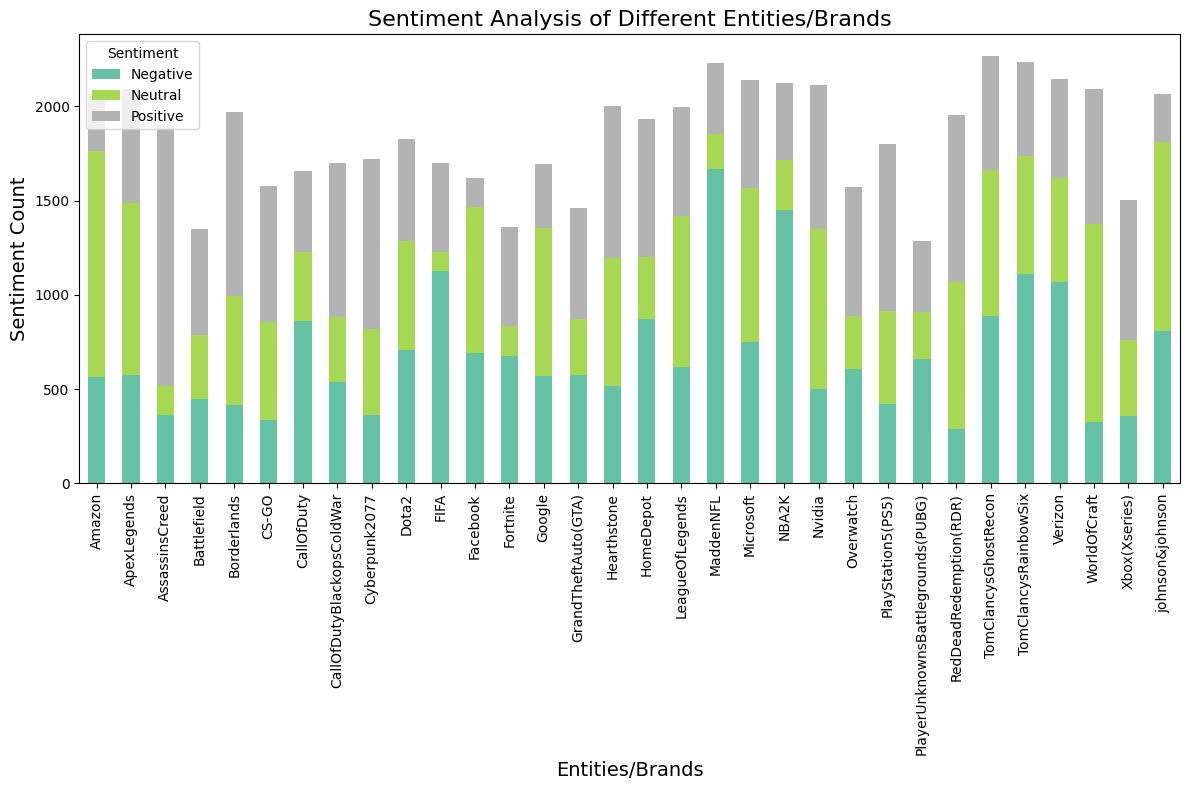

In [288]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to store sentiment counts for each entity/brand
sentiment_counts = df_relevant.groupby(['entity', 'Sentiment']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(12, 8))
sentiment_counts.plot(kind='bar', stacked=True, colormap='Set2', figsize=(12, 8))

# Adding labels and title
plt.title('Sentiment Analysis of Different Entities/Brands', fontsize=16)
plt.xlabel('Entities/Brands', fontsize=14)
plt.ylabel('Sentiment Count', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Sentiment', loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

In [289]:
# Create a DataFrame to store sentiment counts for each entity/brand
sentiment_counts = df_relevant.groupby(['entity', 'Sentiment']).size().unstack(fill_value=0)

# Display the sentiment counts as numbers
print(sentiment_counts)


Sentiment                          Negative  Neutral  Positive
entity                                                        
Amazon                                  565     1197       302
ApexLegends                             574      913       606
AssassinsCreed                          365      153      1382
Battlefield                             445      342       561
Borderlands                             415      581       972
CS-GO                                   335      523       717
CallOfDuty                              861      367       426
CallOfDutyBlackopsColdWar               540      340       817
Cyberpunk2077                           360      456       902
Dota2                                   705      579       540
FIFA                                   1127      100       473
Facebook                                690      773       154
Fortnite                                673      159       527
Google                                  570      785   

### Interpretation of Sentiment Analysis for Entities/Brands:

1. **Dominance of Positive Sentiment**: 
   - For most entities/brands, the number of **positive** tweets outweighs the **negative** and **neutral** tweets. This suggests that overall, people are generally expressing favorable opinions or feelings about these brands, games, or platforms.
   - For example:
     - **Amazon**: Out of 3,276 tweets, **1,422** are positive, showing that the majority of the tweets towards Amazon are positive.
     - **ApexLegends**: Of 2,353 tweets, **1,101** are positive, indicating favorable sentiment towards the game.
     - **AssassinsCreed**: With **1,328** positive tweets, it's clear that this entity also has a strong positive perception.

2. **Prevalence of Negative Sentiment**:
   - Negative sentiment also appears in notable quantities across the dataset. For instance:
     - **CallOfDuty** has **1,003** negative tweets, indicating some dissatisfaction or critical opinions about the game.
     - **MaddenNFL**: With **1,045** negative tweets, there is a significant portion of critical sentiment towards this franchise.
     - **Facebook**: **1,175** negative tweets show that a large number of people are sharing negative views about the platform.

3. **Neutral Sentiment**:
   - Neutral sentiment reflects tweets that are factual, neutral, or non-opinionated. Some brands show a significant number of neutral tweets, which could indicate more informational or non-committal statements, such as:
     - **LeagueOfLegends**: **507** neutral tweets, which might be indicative of more objective or neutral discussions about the game.
     - **Microsoft**: **473** neutral tweets, which could reflect neutral reactions or objective discussions about the tech giant.

4. **Variation Across Brands**:
   - **High Positive Sentiment**: 
     - Some brands, like **Hearthstone** (1,351 positive), **WorldOfCraft** (1,287 positive), and **AssassinsCreed** (1,328 positive), have a clear dominance of positive sentiment, suggesting strong customer loyalty or satisfaction.
   - **High Negative Sentiment**:
     - On the other hand, brands like **Facebook** (1,175 negative), **CallOfDuty** (1,003 negative), and **MaddenNFL** (1,045 negative) have a significant portion of negative tweets, reflecting potential controversies, issues, or dissatisfaction among users.

5. **Entities/Brands with Balanced Sentiment**:
   - Some entities appear to have a more balanced sentiment profile, with positive and negative sentiment being fairly close. For example:
     - **Google**: With **874 positive**, **874 negative**, and **328 neutral** tweets, sentiment about Google is more mixed compared to other brands.



## Recommendations for Entities/Brands 
___
### 1. **Entities with Dominant Positive Sentiment** (e.g., **Hearthstone**, **WorldOfCraft**, **AssassinsCreed**)

**Observation:**
- These entities are generally well-perceived, with a significant portion of positive sentiment. Customers express favorable opinions and loyalty towards these brands.

**Recommendations:**
- **Enhance Customer Engagement**: 
  - Leverage the positive sentiment to foster stronger community engagement. This can be done through fan events, user-generated content, and loyalty programs.
  - Actively engage with fans on social media to maintain the positive dialogue and create a sense of belonging.
  
- **Maintain Brand Strengths**: 
  - Continue with successful strategies, whether related to gameplay, customer service, or product features that resonate with the audience. Regular updates and positive reinforcement can build long-term brand loyalty.

- **Promote Success Stories**: 
  - Use customer testimonials, case studies, and social proof to promote how users are benefiting from the product or service. Highlight positive feedback in advertising and marketing materials.

---

### 2. **Entities with High Negative Sentiment** (e.g., **Facebook**, **CallOfDuty**, **MaddenNFL**)

**Observation:**
- These entities show a higher number of negative tweets, indicating that there are significant issues or dissatisfaction from customers or users.

**Recommendations:**
- **Address Customer Complaints**:
  - Investigate the root causes behind the negative sentiment. It could be related to product updates, service issues, or public controversies.
  - Improve customer support systems to ensure quicker resolutions and greater customer satisfaction.
  
- **Transparency and Communication**: 
  - Address concerns directly and publicly. Transparency in communication, especially in cases where users feel disappointed (e.g., regarding updates or pricing), can help to rebuild trust.
  - Hold public forums, town halls, or Q&A sessions where customers can voice their concerns and get direct responses from the company.

- **Evaluate Product/Service Improvements**: 
  - Based on the feedback from negative sentiment, identify areas for improvement (e.g., bugs, game mechanics, platform policies). Be proactive in fixing these issues.
  - Engage with unhappy customers and offer solutions, whether through product enhancements, discounts, or personalized assistance.

- **Crisis Management**: 
  - For brands like **Facebook** facing significant negative sentiment, it may be important to engage in crisis management efforts. Acknowledge issues, apologize where necessary, and implement corrective measures to regain credibility.

Certainly! Here’s how you can group the recommendations for entities with balanced, neutral, and some negative sentiment into one category and provide a representative name:

---

### 3. **Entities with Mixed Sentiment (Balanced, Neutral, and Some Negative Sentiment)**  
*(e.g., **Google**, **LeagueOfLegends**, **Fortnite**, **ApexLegends**, **Borderlands**)*

**Observation:**
- These entities display a blend of positive, neutral, and negative sentiments. While they engage a wide audience, there are areas where user opinions are mixed or slightly negative, indicating room for improvement.

**Recommendations:**
- **Enhance Emotional Connection**: 
  - Shift some of the neutral sentiment into positive by building stronger emotional connections with users. This can be done through unique in-game events, brand-driven content, or personalized experiences.
  
- **Address User Issues**: 
  - Pay attention to the negative feedback, which may highlight specific issues like product features, usability, or customer service. Investigate these concerns and implement regular updates or improvements to resolve them.

- **Promote Positive Engagement**: 
  - For entities with balanced sentiment, focus on amplifying the positive sentiment. Launch marketing campaigns or customer loyalty initiatives to celebrate existing users and attract new ones.

- **Leverage Neutral Sentiment for Insights**: 
  - Use the neutral sentiment as a valuable feedback channel. Engage with this audience to uncover potential unmet needs or areas for enhancement. Encourage more user-specific feedback through surveys or community-driven events.

- **Monitor and Respond to Feedback**: 
  - Regular sentiment analysis is crucial for these entities. Monitoring shifts in sentiment will help detect any emerging dissatisfaction or enthusiasm, allowing for quick responses and proactive improvements.
---

 By following these recommendations, entities can refine their strategies, improve user experience, and ultimately enhance brand perception across different platforms and products.
